<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/matusiak/drzewa_losowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [26]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['target'] = data.target
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

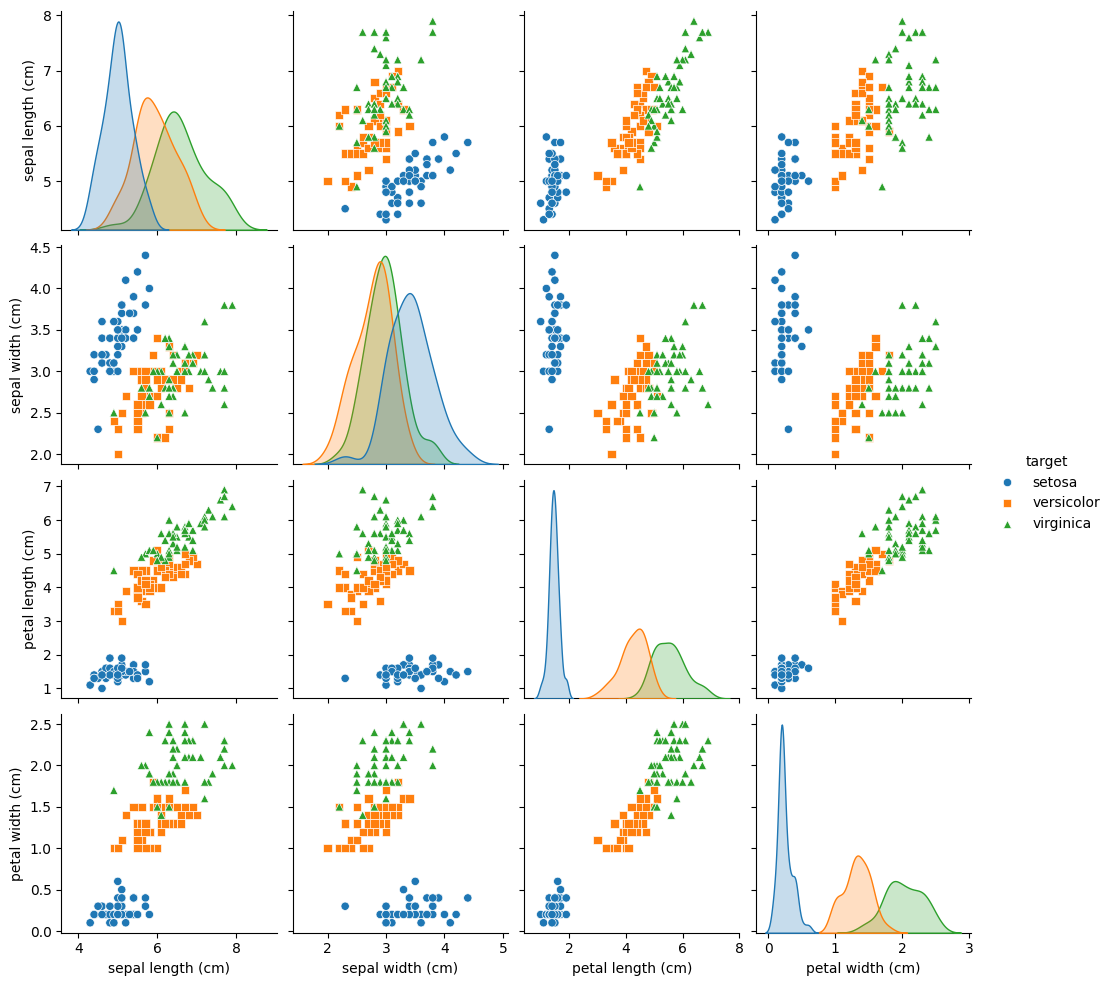

In [29]:
# wizualizacja danych
sns.pairplot(df, hue='target', markers=["o", "s", "^"])
plt.show()

In [30]:
# obliczanie entropii - funkcja
def entropy(probabilities):
    return -np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps))

In [31]:
# obliczenie prawdopodobieństw i entropii dla całego zbioru
class_counts = df['target'].value_counts()
class_probabilities = class_counts / len(df)
original_entropy = entropy(class_probabilities.values)
print("Prawdopodobieństwa wystąpienia klas:", class_probabilities)
print("Entropia:", original_entropy)

Prawdopodobieństwa wystąpienia klas: target
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: count, dtype: float64
Entropia: 1.5849625007211552


In [32]:
# funkcja do obliczenia entropii po podziale
def entropy_after_split(df, column, threshold):
    group1 = df[df[column] <= threshold]
    group2 = df[df[column] > threshold]
    group1_prob = group1['target'].value_counts() / len(group1)
    group2_prob = group2['target'].value_counts() / len(group2)
    entropy1 = entropy(group1_prob.values)
    entropy2 = entropy(group2_prob.values)
    total_entropy = (len(group1) / len(df)) * entropy1 + (len(group2) / len(df)) * entropy2
    return total_entropy

In [33]:
# obliczenie entropii i zysku informacyjnego dla podziałów
for threshold in [0.5, 0.38]:
    total_entropy = entropy_after_split(df, 'petal width (cm)', threshold)
    information_gain = original_entropy - total_entropy
    print(f"Entropia po podziale na poziomie {threshold}:", total_entropy)
    print(f"Zysk informacyjny po podziale na poziomie {threshold}:", information_gain)

Entropia po podziale na poziomie 0.5: 0.7206249385363913
Zysk informacyjny po podziale na poziomie 0.5: 0.8643375621847639
Entropia po podziale na poziomie 0.38: 0.9654476494015438
Zysk informacyjny po podziale na poziomie 0.38: 0.6195148513196114


In [34]:
# podział danych na zbiory testowe i uczące
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# trenowanie drzewa decyzyjnego
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Dokładność drzewa decyzyjnego:", dt_accuracy)

Dokładność drzewa decyzyjnego: 1.0


In [35]:
# trenowanie lasu losowego
rf_classifier = RandomForestClassifier(n_estimators=15, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Dokładność lasu losowego:", rf_accuracy)

Dokładność lasu losowego: 1.0


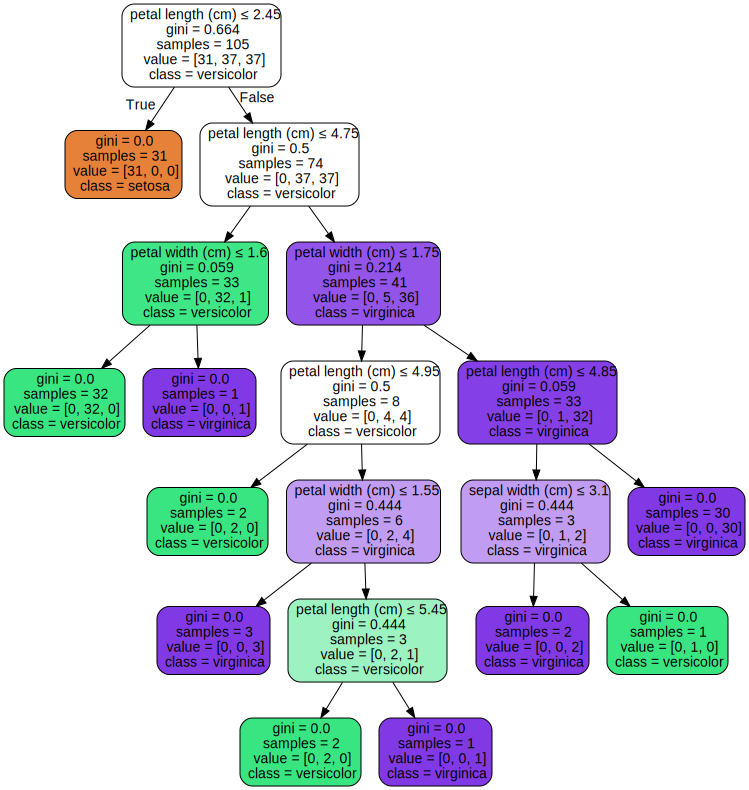

In [36]:
# wizualizacja drzewa decyzyjnego
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph